### Udacity Inferential Statistics


In [22]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [4]:
# Import the data into a series

Klout = pd.read_csv('Klout scores (Lesson 7) - Sheet1.csv',  squeeze = True, header=0)

In [8]:
print (Klout[0:5])
print (type(Klout))

0    60.908747
1    23.222238
2    51.553491
3    22.629690
4    53.338099
Name: 25.10417915, dtype: float64
<class 'pandas.core.series.Series'>


In [9]:
# mean
np.mean(Klout)

37.73110342440305

In [10]:
# Standard Deviation
np.std(Klout)

16.039573139265414

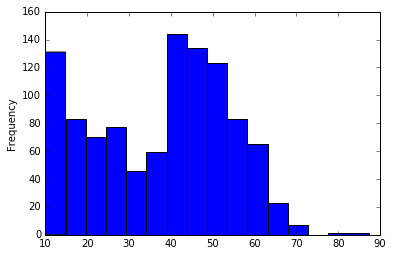

In [14]:
# frequency distribution
Klout.plot.hist(bins = 16)

### What is the standard deviation of the sample means?

This is the Standard Error and is calculated `std/sqrt(n)` where std is the population std and n is the number of samples.


In [19]:
# standard error
std_sample_mean = (np.std(Klout))/math.sqrt(35)
print (std_sample_mean)

2.7111826965358787


(array([ 5.,  1.,  5.,  8.,  5.,  2.,  2.,  4.,  0.,  3.]),
 array([ 32.51597319,  33.63397444,  34.75197568,  35.86997692,
         36.98797817,  38.10597941,  39.22398065,  40.3419819 ,
         41.45998314,  42.57798439,  43.69598563]),
 <a list of 10 Patch objects>)

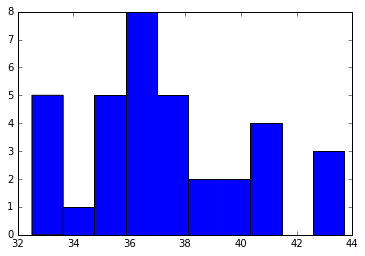

In [42]:
# plot the distribution of the sampling distribution
mu, sigma = 37.72, 2.71 # mean and standard deviation
s = np.random.normal(mu, sigma, 35)

bins = 1000
plt.hist(s)

In [43]:
# Standard error with a population size of 250

std_error = (np.std(Klout))/math.sqrt(250)
print(std_error)

1.0144316763387164


In [44]:
# z-score
zscore = 40.0-mu/1.0144
print(zscore)

# the value in the tutorial is 2.26, not sure how.

2.815457413249213


### Correlation

- Look at age, when you arrive at a party
- Look at age, number of pets

In [3]:
# read in the csv file
correlations = pd.read_csv('Correlations.csv', header=0)

In [8]:
correlations.head(5)

,dentist,temp,age,year,pets,eggs,icons,emails,party
0,1,30.0,26,1987,0,0,8,0,30
1,10,10.0,69,1944,0,0,8,0,0
2,10,20.0,39,1974,1,0,34,500,60
3,5,NaN,26,1987,0,12,22,1267,0
4,3,15.0,31,1982,0,3,28,1,30


In [9]:
correlations.dtypes

# Why is icons an object? It looks like a number

dentist      int64
temp       float64
age          int64
year         int64
pets         int64
eggs         int64
icons       object
emails       int64
party        int64
dtype: object

In [10]:
correlations.count()

# temp has some nans in it

dentist    61
temp       57
age        61
year       61
pets       61
eggs       61
icons      61
emails     61
party      61
dtype: int64

In [12]:
# create two scatter plots with a correlation line through the middle

age_pets = correlations[["age","pets"]].corr()

age_party = correlations[["age","party"]].corr()

In [17]:
print(age_pets["age"][1])
print(age_party["age"][1])

0.375764613798
-0.164214126066


In [18]:
print(age_party)

            age     party
age    1.000000 -0.164214
party -0.164214  1.000000


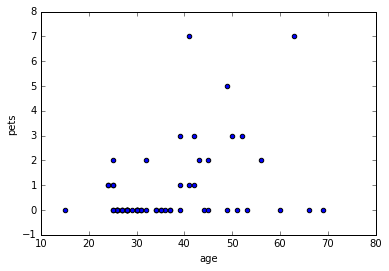

In [21]:
correlations.plot.scatter(x='age', y='pets')

In [60]:
# Use sm to make an OLS model
results = sm.OLS(correlations["pets"],sm.add_constant(correlations["age"])).fit()

print (results.summary())

print (results.params)

                            OLS Regression Results                            
Dep. Variable:                   pets   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     9.700
Date:                Fri, 09 Sep 2016   Prob (F-statistic):            0.00284
Time:                        16:22:07   Log-Likelihood:                -108.99
No. Observations:                  61   AIC:                             222.0
Df Residuals:                      59   BIC:                             226.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0329      0.614     -1.683      0.0

In [89]:
# do the same for age and party
# Use sm to make an OLS model
results_party = sm.OLS(correlations["party"],sm.add_constant(correlations["age"])).fit()

print (results_party.summary())

                            OLS Regression Results                            
Dep. Variable:                  party   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.635
Date:                Sat, 10 Sep 2016   Prob (F-statistic):              0.206
Time:                        12:27:21   Log-Likelihood:                -301.28
No. Observations:                  61   AIC:                             606.6
Df Residuals:                      59   BIC:                             610.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         46.7532     14.356      3.257      0.0

**r** = pearson correlation coefficient. Determines the strength and direction of the relationship -1 to 1. Close to 0 means very weak relationship.      
**$r^2$** = Coefficient of determination. From 0 to 1 and gives the proportion of variance in one variable which is explained by variance in the other. Tells us: How well does the regression line represent the data?

In [28]:
# the above table give r^2 of 0.141
r = np.sqrt(0.141)
print (r)

0.37549966711


In [33]:
print (results.params) # gives the intercept (const?) and the gradient?
print (results.params[1])

const   -1.032887
age      0.050503
dtype: float64
0.0505032343646


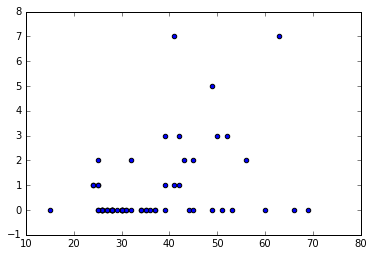

In [36]:
plt.scatter(correlations["age"],correlations["pets"])

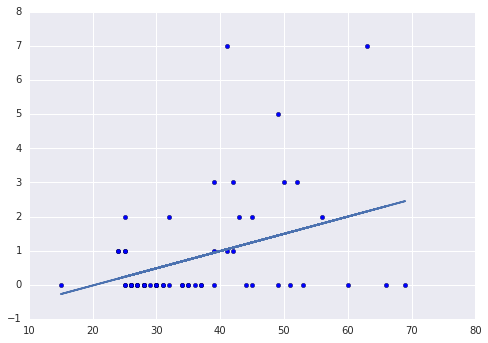

In [69]:
plt.scatter(correlations["age"],correlations["pets"])

plt.plot(correlations["age"], correlations["age"]*results.params[1] + results.params[0])

In [86]:
print (m,b)

0.0505032343646 -1.03288703497


Would also be nice to put r and $r^2$ on the graph

In [61]:
# the names of all of the parameters from the model that are available
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',

In [88]:
# 95% confidence intervals for the correlation
confidence95 = results.conf_int_el

print(confidence95)

<bound method OLSResults.conf_int_el of <statsmodels.regression.linear_model.OLSResults object at 0x7fee19926470>>


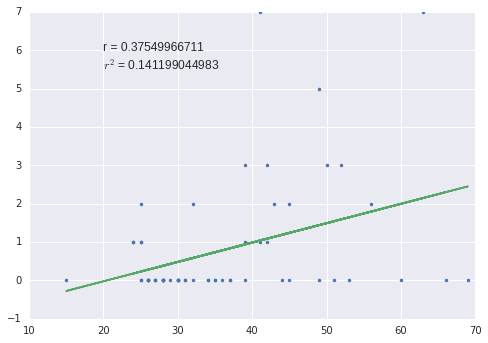

In [68]:
# fit with np.polyfit
m, b = np.polyfit(correlations["age"], correlations["pets"], 1)

plt.plot(correlations["age"], correlations["pets"], '.')
plt.plot(correlations["age"], m*correlations["age"] + b, '-')
plt.text(20,6,"r = %s"%str(r))
plt.text(20,5.5,"$r^2$ = %s"%str(results.rsquared))  # from results.rsquared

In [67]:
import seaborn as sns

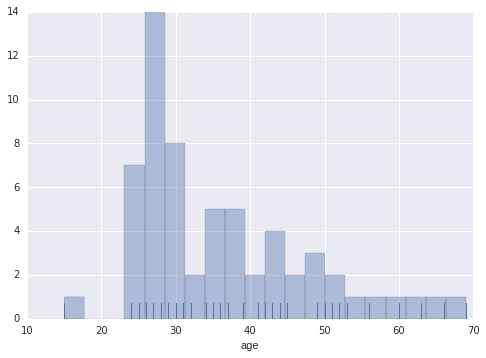

In [73]:
# rug allows you to see where exactly each value is in the bin. Could help you decide how/where to bin.
sns.distplot(correlations["age"], bins = 20, kde = False, rug = True)


/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


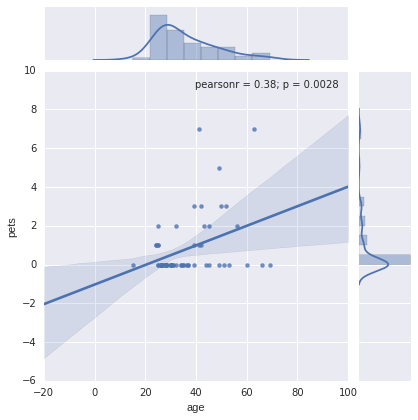

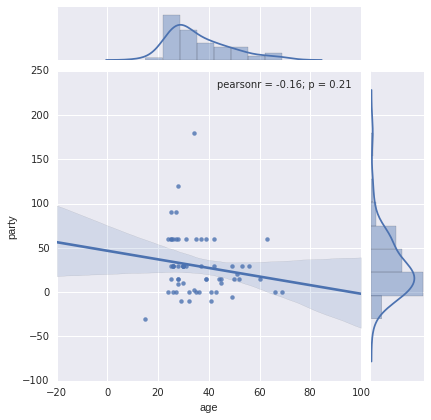

In [77]:
sns.jointplot(x="age", y="pets", data=correlations, kind = "reg")
sns.jointplot(x="age", y="party", data=correlations, kind = "reg")

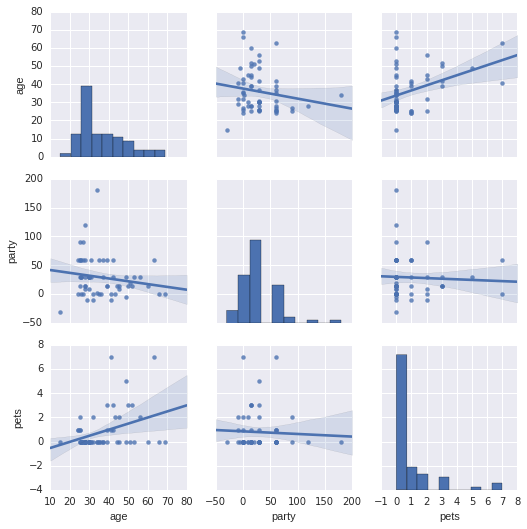

In [79]:
sns.pairplot(correlations[["age","party","pets"]],kind = "reg");

What happens to the correlation coefficient if we add an outlier in the Age/Pets relationship?

In [90]:
list(correlations)

['dentist', 'temp', 'age', 'year', 'pets', 'eggs', 'icons', 'emails', 'party']

In [92]:
# add the extra data to the dataframe
s2 = pd.Series([None,None,20,None,8,None,None,None,None], index = list(correlations))

correlations2 = correlations.append(s2, ignore_index=True)

In [96]:
print(correlations2[["age","pets"]].count()) 
print(correlations[["age","pets"]].count()) 
# confirmation we have the extra data in!

age     62
pets    62
dtype: int64
age     61
pets    61
dtype: int64


In [99]:
results_pets_outlier = sm.OLS(correlations2["pets"],sm.add_constant(correlations2["age"])).fit()

print (results_pets_outlier.summary())

                            OLS Regression Results                            
Dep. Variable:                   pets   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.397
Date:                Sat, 10 Sep 2016   Prob (F-statistic):             0.0703
Time:                        14:38:51   Log-Likelihood:                -122.48
No. Observations:                  62   AIC:                             249.0
Df Residuals:                      60   BIC:                             253.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3683      0.726     -0.507      0.6

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


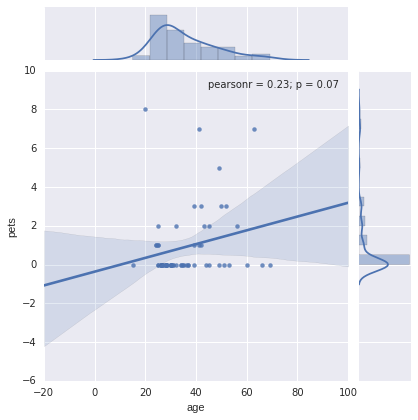

In [100]:
# Actually the above doesn't give us the plain old r
# So lets visualise it in seaborn (also gives us r)
sns.jointplot(x="age", y="pets", data=correlations2, kind = "reg")

Relationship between gestation and longevity

In [102]:
ls

081-Inferential.ipynb  Gestation.csv
Correlations.csv       Klout scores (Lesson 7) - Sheet1.csv


In [120]:
gestation = pd.read_csv("Gestation.csv", header=0)

In [121]:
list(gestation)

['Animal', 'Gestation (days)', 'Longevity (years)']

In [122]:
# Change the names of Gestation and Longevity columns
# split the string up into before and after the space and just take the first part.
#x.split(',')[1] means split the string where the , is. Take the 2nd item. i.e
#[name[1].split(',')[1].split('.')[0].strip()]

gestation.columns = [x.split(" ")[0] for x in list(gestation)]

In [123]:
list(gestation) # Yes!

['Animal', 'Gestation', 'Longevity']

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


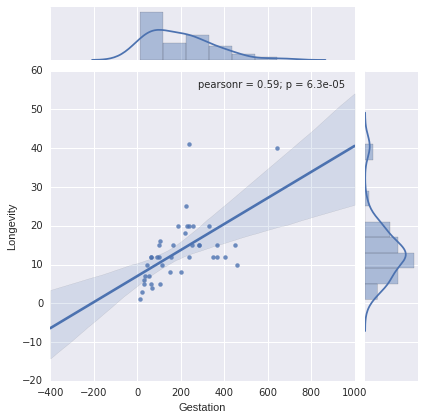

In [124]:
# make a plot of the relationship between Gestation and Longevity
sns.jointplot(x="Gestation", y="Longevity", data=gestation, kind = "reg")

From this plot and r and p statistics we can conclude that animals that gestate longer, are likely to live longer

In [125]:
# use an OLS stats model to get all the stats I need on the relationship
G_L = sm.OLS(gestation["Longevity"],sm.add_constant(gestation["Gestation"])).fit()

print (G_L.summary())

                            OLS Regression Results                            
Dep. Variable:              Longevity   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     20.22
Date:                Sat, 10 Sep 2016   Prob (F-statistic):           6.31e-05
Time:                        16:32:05   Log-Likelihood:                -132.29
No. Observations:                  40   AIC:                             268.6
Df Residuals:                      38   BIC:                             272.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.0132      1.806      3.883      0.0